### The Sparks Foundation
#### Data Science and Business Analytics Intern
### Name: Ayushi Shrivastava
#### TASK 2 Prediction using UNSUPERVISED ML
#### To predict the optimum number of clusters and represent it visually.

In [12]:
#importing all the required libraries.
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans as kmeans

In [2]:
data=pd.read_csv('/content/Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
#Loading the dataset required.
iris = datasets.load_iris()
# Converting iris into a datadrame,we will use:
data = pd.DataFrame(iris.data, columns=iris.feature_names)  
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
data.shape


(150, 4)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
#Before prediction, it is important to check for any null values.
#Data used for prediction should be clean i.e. no null values should be present.
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

### We will use K-MEANS Clustering algorithm.
##### Kmeans algorithm is an iterative algorithm that tries to partition the dataset into K pre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group.
##### It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. 

In [8]:
#To find the optimal number of clusters,we'll implement THE ELBOW METHOD which helps us to find the optimal number of clusters.
x = df.iloc[:,[0,1,2,3]].values

##### Elbow method gives us an idea on what a good k number of clusters would be based on the sum of squared distance (SSE) between data points and their assigned clusters’ centroids. We pick k at the spot where SSE starts to flatten out and forming an elbow. 

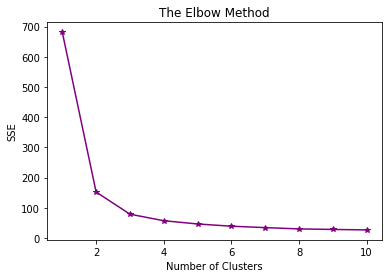

In [19]:
sse = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 1)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)
#Plotting the results onto a line graph, to observe 'The elbow'
plt.plot(range(1,11), sse, marker='*',color='purple')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

#### By taking number of clusters as 3, applying KMEANS to the data and visualising it.

In [20]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 1)
y_kmeans = kmeans.fit_predict(x)

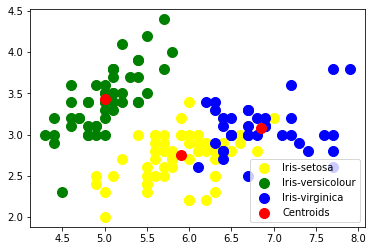

In [22]:
#Plotting clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'yellow', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()
plt.show()